In [1]:
%matplotlib notebook

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import h5py
import psana
from tqdm import tqdm
from utilities import *

In [5]:
expname = 'xppl1001021'
run = 82
with h5py.File('/sdf/data/lcls/ds/xpp/{}/hdf5/smalldata/{}_Run{:04d}.h5'.format(expname, expname, run)) as f:
#     data = f['Sums/jungfrau1M_alcove_calib_dropped_square'][:]
#     print (f.keys())
#     print (f['Sums'].keys())
    mask = f['UserDataCfg/epix_alc5/mask'][()] #this is the general mask we use for photonization   
    droplet_mask = f['UserDataCfg/epix_alc5/ragged_droplet__ragged_droplet_droplet_mask'][()]
    photons_j = f['epix_alc5/ragged_droplet_photon_j'][()]
    photons_i = f['epix_alc5/ragged_droplet_photon_i'][()]
    crl_z = f['scan/crl_z'][()]
#     diodes = f['lombpm']['channels'][()]
#     diodeU = f['diodeU']['channels'][:,3]

<IPython.core.display.Javascript object>


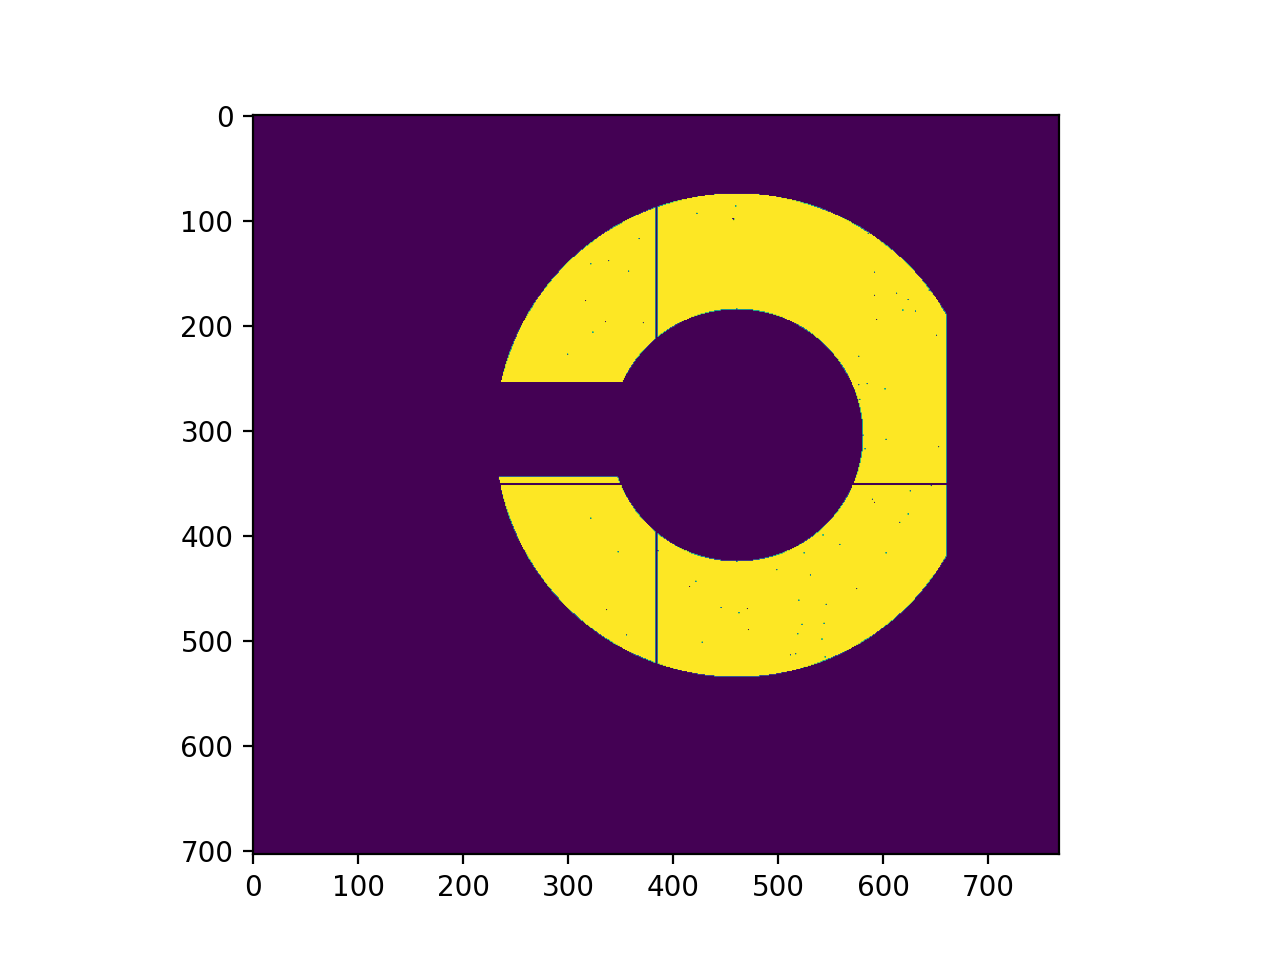

In [14]:
plt.figure()
plt.imshow(droplet_mask)

In [7]:
w = np.where(crl_z == 45)[0]
photons_j = photons_j[w]
photons_i = photons_i[w]

In [11]:
nframe = len(photons_i)
shape = mask.shape
imgs_reconstruct = np.zeros(np.r_[nframe, shape])
for i in tqdm(range(nframe)):
    imgs_reconstruct[i] = reconstruct_img(photons_i[i], photons_j[i], shape)

100%|██████████| 1203/1203 [00:11<00:00, 103.10it/s]


<IPython.core.display.Javascript object>


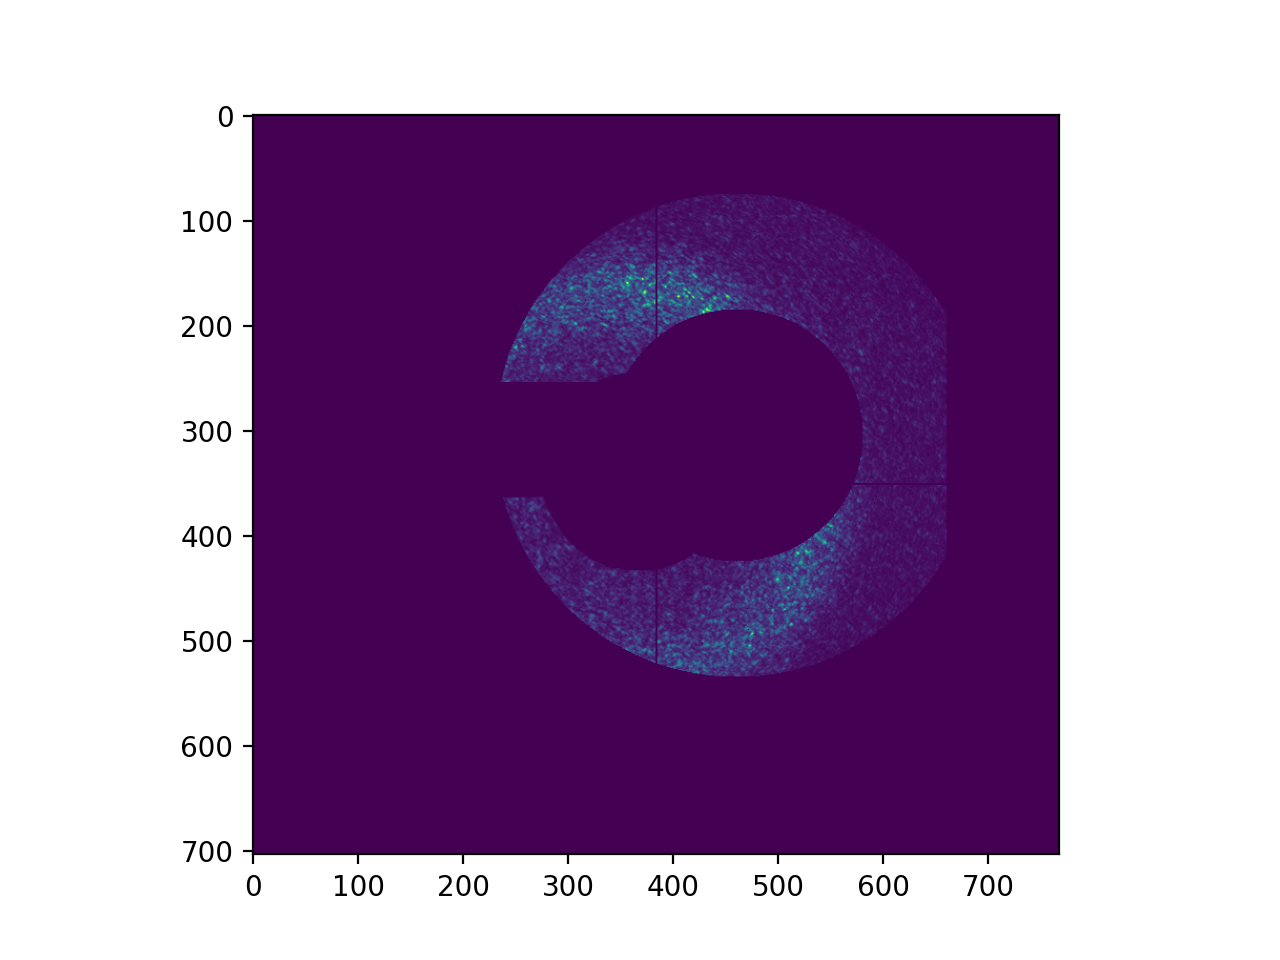

In [13]:
plt.figure()
plt.imshow(imgs_reconstruct.mean(axis = 0))